# 이미지 만드는 방법 3가지
* 이미지 파일이나 동영상 캡처
* openCV의 그리기 함수
* Numpy 배열

## 1. 이미지와 비디오 입력

In [ ]:
import cv2
img_file = 'img/jiheon.jpg'
img = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE) # 이미지 파일이 폴더 안에 없으면 아마 에러날거야!
# Gray image 로 읽는것!
if img is not None:
    cv2.imshow('IMG', img)
    cv2.waitKey(0) # milisec 단위 시간만큼 기다림. 0은 무한..
#    cv2.destroyAllWindows # 현재 상태에서 열린 모든 윈도우를 닫아준다.
    cv2.destroyWindow('IMG')
else:
    print('No image file.')

In [ ]:
import cv2
img_file = 'img/jiheon.jpg'
save_file = 'img/jeheon_gray.jpg'
img = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE) # 이미지 파일이 폴더 안에 없으면 아마 에러날거야!
# Gray image 로 읽는것!
if img is not None:
    cv2.imshow('IMG', img)
    cv2.imwrite(save_file, img)
    cv2.waitKey(0) # milisec 단위 시간만큼 기다림. 0은 무한..
#    cv2.destroyAllWindows # 현재 상태에서 열린 모든 윈도우를 닫아준다.
    cv2.destroyWindow('IMG')
else:
    print('No image file.')

In [8]:
import cv2

cap = cv2.VideoCapture(0) # 0번 카메라 장치 연결
if cap.isOpened():
    while True:
        ret, img = cap.read() # 카메라 프레임 읽기
        if ret: # 성공적으로 읽어왔으면
            cv2.imshow('camera', img) # 프레임 이미지 표시
            if cv2.waitKey(1) != -1: # 1ms 대기하면서 아무키나 눌린 경우 중지
                break
        else:
            print('no frame')
            break
else:
    print("can't open camera.")
cap.release()
cv2.destroyAllWindows()

In [10]:
# 비디오 처리하기!
import cv2
video_file = "img/meat.mp4"
cap = cv2.VideoCapture(video_file)

# 모든 디지털 영상은 스틸 이미지를 연속해서 보여주는것!! 주로 초당 30 Frame.
if cap.isOpened():  # video가 비어있는지, 존재 하는지 체크 (예외처리)
    fps = cap.get(cv2.CAP_PROP_FPS)
    delay = int(1000/fps)
    while True:
        ret, img = cap.read() # 읽는거
        
        if ret:
            cv2.imshow(video_file, img) # 매 순간 이미지를 
            cv2.waitKey(delay)          # 초당 뿌리는 것
        else:
            break
    cv2.destroyAllWindows()
else:
    print('No video file.')

In [14]:
# 비디오 처리하기!
import cv2
video_file = "img/meat.mp4"
cap = cv2.VideoCapture(video_file) # 0으로 넣어서...? 책 예제 따라해봐

# 모든 디지털 영상은 스틸 이미지를 연속해서 보여주는것!! 주로 초당 30 Frame.
if cap.isOpened():  # video가 비어있는지, 존재 하는지 체크 (예외처리)
    fps = cap.get(cv2.CAP_PROP_FPS)
    delay = int(1000/fps)
    while True:
        ret, img = cap.read() # 읽는거
        if ret:
            cv2.imshow(video_file, img) # 매 순간 이미지를 
            if cv2.waitKey(delay) != -1:
                cv2.imwrite('img/photo.jpg', img)
                break # 저장 되자마자 종료
        else:
            break
    cv2.destroyAllWindows()
else:
    print('No video file.')

In [2]:
# 카메라 프레임 크기 설정
import cv2

cap = cv2.VideoCapture(0)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
print("Original width: %d, height: %d" % (width, height))

cap.set(cv2.CAP_PROP_FRAME_WIDTH, 320)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 240)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
print("Resized width: %d, height: %d" % (width, height))

if cap.isOpened():
    while True:
        ret, img = cap.read()
        if ret:
            cv2.imshow('camera', img)
            if cv2.waitKey(1) != -1:
                break
        else:
            print('no frame!')
            break
else:
    print("can't open camera!")
cap.release()
cv2.destroyAllWindows()

Original width: 640, height: 480
Resized width: 0, height: 0
can't open camera!


In [4]:
# 비디오 처리하기!
import cv2
video_file = "img/meat.mp4"
cap = cv2.VideoCapture(video_file) # 0으로 넣으면 카메라 녹화 화면..

# 모든 디지털 영상은 스틸 이미지를 연속해서 보여주는것!! 주로 초당 30 Frame.
if cap.isOpened():  # video가 비어있는지, 존재 하는지 체크 (예외처리)
    fps = cap.get(cv2.CAP_PROP_FPS)
    delay = int(1000/fps)
    while True:
        ret, img = cap.read() # 읽는거
        if ret:
            cv2.imshow(video_file, img) # 매 순간 이미지를 출력
            if cv2.waitKey(delay) != -1:
                cv2.imwrite('img/photo.jpg', img)
                break # 저장 되자마자 종료
        else:
            break
    cv2.destroyAllWindows()
else:
    print('No video file.')

In [8]:
# 카메라로 녹화하기
import cv2

# video_file = "img/meat.mp4"
cap = cv2.VideoCapture(0) # video_file를 넣으면 해당 비디오 파일에 대해 수행 
if cap.isOpened():
    file_path = './record.mp4'
    fps = 25.40
    fourcc = cv2.VideoWriter_fourcc(*'DIVX')
    width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
    size = (int(width), int(height))
    out = cv2.VideoWriter(file_path, fourcc, fps, size)
    while True:
        ret, frame = cap.read()
        if ret:
            cv2.imshow('camera-recording',frame)
            out.write(frame)
            if cv2.waitKey(int(1000/fps)) != -1:
                break
        else:
            print("no frame!")
            break
    out.release()
else:
    print("Can't open camera!")
cap.release()
cv2.destroyAllWindows()

## 2.  openCV 그리기

In [16]:
import numpy as np
import cv2

img = np.full((500,500,3), 255, dtype=np.uint8)
cv2.imwrite('img/blank_500.jpg', img)

True

### 2.2.1 직선 그리기
* cv2.line(img, start, end, color [, thickness, linetype])
    * img: 그림 그릴 대상 이미지, Numpy 배열
    * start: 선 시작 지점 좌표(x,y)
    * end: 선 끝 지점 좌표(x,y)
    * color: (Blue, Green, Red), 0~255 # openCV는 BGR 순서다!
    * thickness=1:선 두께
    * lineType:선 그리기 형식
        * cv2.LINE_4:4 연결 선 알고리즘
        * cv2.LINE_8:8 연결 선 알고리즘
        * cv2.LINE_AA: 안티에일리어싱(anti-aliasing, 계단 현상 없는 선)

In [25]:
import cv2

img = cv2.imread('./img/blank_500.jpg')

cv2.line(img, (50,50), (150,50), (255,0,0)) # (x,y 이므로) x축 즉, 가로로 100 길이의 (BGR 순서) Blue색 직선
cv2.line(img, (200,50), (300,50), (0,255,0))
cv2.line(img, (350,50), (450,50), (0,0,255))

cv2.line(img, (100,100), (400,100), (255,255,0), 10)
cv2.line(img, (100,150), (400,150), (255,0,255), 10)
cv2.line(img, (100,200), (400,200), (0,255,255), 10)
cv2.line(img, (100,250), (400,250), (200,200,200), 10)
cv2.line(img, (100,300), (400,300), (0,0,0), 10)

cv2.line(img, (100,350), (400,400), (0,0,255), 20, cv2.LINE_4)
cv2.line(img, (100,400), (400,450), (0,0,255), 20, cv2.LINE_8)
cv2.line(img, (100,450), (400,500), (0,0,255), 20, cv2.LINE_AA)

cv2.imshow('lines', img) 
cv2.waitKey(0)
cv2.destroyAllWindows()

### 2.2.2 사각형그리기
* cv2.rectangle(img, start, end, color [, thickness, linetype])
    * img: 그림 그릴 대상 이미지, Numpy 배열
    * start: 사각형 시작 꼭지점(x,y)
    * end: 사각형 끝 꼭지점(x,y)
    * color: 색상(Blue, Green, Red)
    * thickness: 선 두께
        - -1: 채우기
    * lineType: 선타입, cv2.line()과 동일

In [28]:
import cv2

img = cv2.imread('./img/blank_500.jpg')

cv2.rectangle(img, (50,50), (150,150), (255,0,0)) # 채우기 없음
cv2.rectangle(img, (300,300), (100,100), (0,255,0), 10) # 선 두께 10
cv2.rectangle(img, (450,200), (200,450), (0,0,255), -1) # -1은 채워 그리기

cv2.imshow('rectangle', img) 
cv2.waitKey(0)
cv2.destroyAllWindows()

### 2.2.3 다각형 그리기
* cv2.polylines(img, points, isClosed, color [, thickness, linetype])
    * img: 그림 그릴 대상 이미지
    * points: 꼭지점 좌표, NumPy 배열 리스트
    * isClosed: 닫힌 도형 여부, True/False - 처음과 마지막 좌표를 잇는다
    * color: 색상(Blue, Green, Red)
    * thickness: 선 두께
    * lineType: 선타입, cv2.line()과 동일

In [29]:
import cv2

img = cv2.imread('./img/blank_500.jpg')

pts1 = np.array([[50,50],[150,150],[100,140],[200,240]], dtype=np.int32) # 번개모양
pts2 = np.array([[350,50],[250,200],[450,200]], dtype=np.int32) # 삼각형
pts3 = np.array([[150,300],[50,450],[250,450]], dtype=np.int32) # 삼각형
pts4 = np.array([[350,250],[450,350],[400,450],[300,450],[250,350]], dtype=np.int32) # 오각형

cv2.polylines(img, [pts1], False, (255,0,0)) # 열린 파란색 번개모양 다각형 그리기
cv2.polylines(img, [pts2], False, (0,0,0), 10) # 열린 검정색 두께 10의 삼각형 그리기
cv2.polylines(img, [pts3], True, (0,0,255), 10) # 닫힌 빨간색 두께 10의 삼각형 그리기
cv2.polylines(img, [pts4], True, (0,0,0)) # 닫힌 오각형 그리기

cv2.imshow('polyline', img) 
cv2.waitKey(0)
cv2.destroyAllWindows()

### 2.2.4 원, 타원, 호 그리기
* cv2.circle(img, center, radius, color [, thickness, linetype])
    * img: 그림 그릴 대상 이미지
    * center: 원점 좌표(x,y)
    * color: 색상(Blue, Green, Red)
    * thickness=1: 선 두께
        -1: 채우기
    * lineType: 선타입, cv2.line()과 동일
* cv2.ellipse(img, center, axes, angle, from, to, color [, thickness, linetype])
    * img: 그림 그릴 대상 이미지
    * center: 원점 좌표(x,y)
    * axes: 기준 축 길이(가로, 세로)
    * angle: 기준 축 회전 각도
    * from, to: 호를 그릴 시작 각도와 끝 각도
    * color: (Blue, Green, Red), 0~255 # openCV는 BGR 순서다!
    * thickness: 선 두께
    * lineType: 선타입, cv2.line()과 동일

In [40]:
import cv2

img = cv2.imread('img/blank_500.jpg')

cv2.circle(img, (150,150), 100, (255,0,0)) # 반지름이 100인 파란색 원
cv2.circle(img, (300,150), 70, (0,255,0), 5) # 두께 5, 반지름이 70인 초록색 원
cv2.circle(img, (400,150), 50, (0,0,255), -1) # 반지름이 50인 빨간색 채운 원

cv2.ellipse(img, (50,300), (50,50), 0, 0, 360, (0,0,255)) # 타원
cv2.ellipse(img, (150,300), (50,50), 0, 0, 180, (255,0,0)) # 아래 반원
cv2.ellipse(img, (200,300), (50,50), 0, 181, 360, (0,0,255)) # 위 반원

cv2.ellipse(img, (325,300), (75,50), 0, 0, 360, (0,255,0)) # 납작 타원
cv2.ellipse(img, (450,300), (50,75), 0, 0, 360, (255,0,255)) # 홀쭉 타원

cv2.ellipse(img, (50,425), (50,75), 15, 0, 360, (0,0,0)) # 회전 타원
cv2.ellipse(img, (200,425), (50,75), 45, 0, 360, (0,0,0)) # 회전 타원

cv2.ellipse(img, (350,425), (50,75), 45, 0, 180, (0,0,255)) # 회전 반원
cv2.ellipse(img, (400,425), (50,75), 45, 181, 360, (255,0,0)) # 회전 타원

cv2.imshow('polyline', img) 
cv2.waitKey(0)
cv2.destroyAllWindows()

### 글씨 그리기

* **cv2.putText**(img, text, point, fontFace, fontSize, color [, thickness, lineType])
  * img: 그림 그릴 대상 이미지
  * text: 표시할 문자열
  * point: 글씨를 표시할 좌표(좌측 하단 기준)(x,y)
  * fontFace: 글꼴
    * cv2.FONT_HERSHEY_PLAIN: 산세리프체 작은 글꼴
    * cv2.FONT_HERSHEY_SIMPLEX: 산세리프체 일반 글꼴
    * cv2.FONT_HERSHEY_DUPLEX: 산세리프체 진한 글꼴
    * cv2.FONT_HERSHEY_COMPLEX_SMALL: 세리프체 작은글꼴
    * cv2.FONT_HERSHEY_COMPLEX: 세리프체 일반 글꼴
    * cv2.FONT_HERSHEY_TRIPLEX: 세리프체 진한 글꼴
    * cv2.FONT_HERSHEY_SCRIPT_SIMPLEX: 필기체 산세리프 글꼴
    * cv2.FONT_HERSHEY_SCRIPT_COMPLEX: 필기체 세리프 글꼴
    * cv2.FONT_ITALIC: 이탤릭체 플래그
  * fontSize: 글꼴 크기
  * color, thickness, lineType: cv2.rectangle()과 동일

In [56]:
import cv2

img = cv2.imread('./img/blank_500.jpg')

cv2.putText(img, "Plain", (50,30), cv2.FONT_HERSHEY_PLAIN, 1, (0,0,0))
cv2.putText(img, "Simplex", (50,70), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0))
cv2.putText(img, "Duplex", (50,110), cv2.FONT_HERSHEY_DUPLEX, 1, (0,0,0))
cv2.putText(img, "Simplex", (200,110), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,0,250))

cv2.putText(img, "Complex Small", (50,180), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,0,0))
cv2.putText(img, "Complex", (50,220), cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,0))
cv2.putText(img, "Triplex", (50,260), cv2.FONT_HERSHEY_TRIPLEX, 1, (0,0,0))
cv2.putText(img, "Complex", (200,260), cv2.FONT_HERSHEY_TRIPLEX, 2, (0,0,255))

cv2.putText(img, "Script Simplex", (50,330), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 1, (0,0,0))
cv2.putText(img, "Script Complex", (50,370), cv2.FONT_HERSHEY_SCRIPT_COMPLEX, 1, (0,0,0))

cv2.putText(img, "Plain Italic", (50,430), cv2.FONT_ITALIC, 1, (0,0,0))
cv2.putText(img, "Complex Italic", (50,470), cv2.FONT_ITALIC, 1, (0,0,0))

cv2.imshow('draw text', img)
cv2.waitKey()
cv2.destroyWindow('draw text')

# 레포트 1!! 요거 출력되게

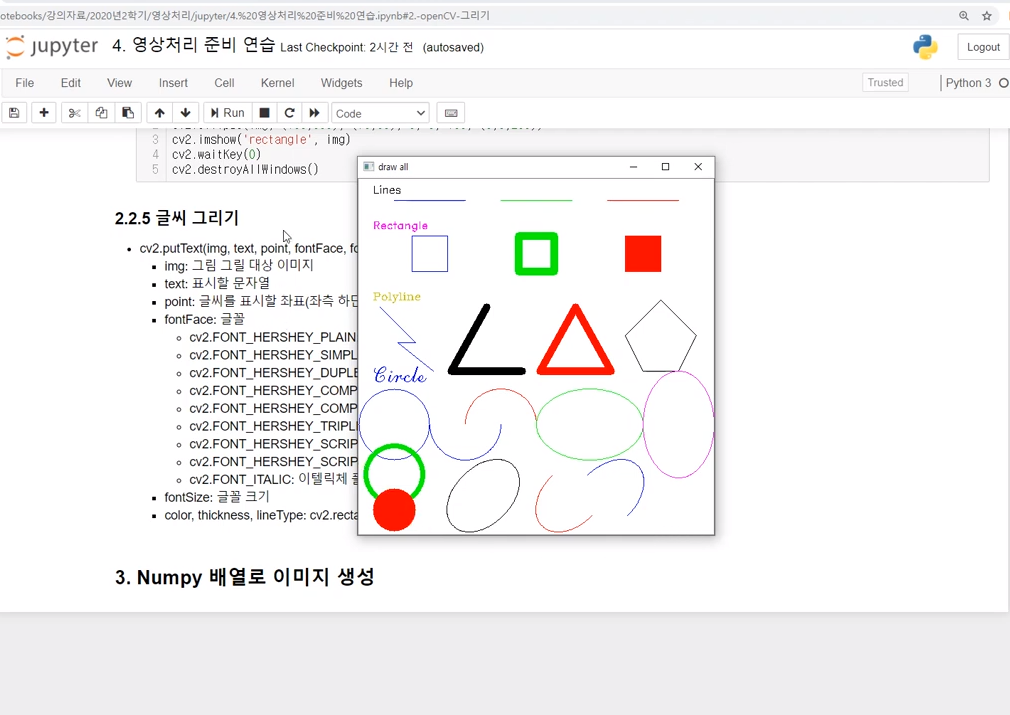

In [162]:
import numpy as np
import cv2

# openCV로 그리려면, 그림판 역할의 빈 NumPy 배열 이미지가 필요하다.
img = np.full((500,500,3), 255, dtype=np.uint8) # 500*500크기의 컬러를 저장할 빈 numpy 배열 선언
cv2.imwrite('img/blank_500.jpg', img) # 저장

img = cv2.imread('./img/blank_500.jpg')

# lines (x,y 이므로) x축 즉, 가로로 100 길이의 (BGR 순서) Blue색 직선
cv2.putText(img, "Lines", (30,20), cv2.FONT_ITALIC, 0.5, (0,0,0))
cv2.line(img, (50,30), (150,30), (255,0,0)) 
cv2.line(img, (200,30), (300,30), (0,255,0))
cv2.line(img, (350,30), (450,30), (0,0,255))

# rectanglues
cv2.putText(img, "Rectanglue", (30,60), cv2.FONT_HERSHEY_PLAIN, 1, (255,0,255))
cv2.rectangle(img, (80,70), (120,110), (255,0,0)) # 채우기 없음
cv2.rectangle(img, (230,70), (270,110), (0,255,0), 10) # 선 두께 10
cv2.rectangle(img, (380,70), (420,110), (0,0,255), -1) # -1은 채워 그리기

# Polylines
cv2.putText(img, "Polyline", (30,150), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,210,210))
pts1 = np.array([[25,160],[70,200],[50,200],[95,240]], dtype=np.int32) # 번개모양
pts2 = np.array([[165,160],[115,240],[215,240]], dtype=np.int32) # 삼각형
pts3 = np.array([[290,160],[240,240],[340,240]], dtype=np.int32) # 삼각형
pts4 = np.array([[405,150],[455,200],[430,250],[380,250],[355,200]], dtype=np.int32) # 오각형

cv2.polylines(img, [pts1], False, (255,0,0)) # 열린 파란색 번개모양 다각형 그리기
cv2.polylines(img, [pts2], False, (0,0,0), 10) # 열린 검정색 두께 10의 삼각형 그리기
cv2.polylines(img, [pts3], True, (0,0,255), 10) # 닫힌 빨간색 두께 10의 삼각형 그리기
cv2.polylines(img, [pts4], True, (0,0,0)) # 닫힌 오각형 그리기

# Circle
cv2.putText(img, "Circle", (30,280), cv2.FONT_HERSHEY_SCRIPT_COMPLEX, 1, (255,0,0))
cv2.circle(img, (50,340), 50, (255,0,0)) # 반지름이 50인 파란색 원
cv2.circle(img, (50,410), 40, (0,255,0), 5) # 두께 5, 반지름이 40인 초록색 원
cv2.circle(img, (50,450), 30, (0,0,255), -1) # 반지름이 30인 빨간색 채운 원

cv2.ellipse(img, (150,340), (50,50), 0, 0, 180, (255,0,0)) # 아래 반원
cv2.ellipse(img, (200,340), (50,50), 0, 181, 360, (0,0,255)) # 위 반원

cv2.ellipse(img, (325,340), (75,50), 0, 0, 360, (0,255,0)) # 납작 타원
cv2.ellipse(img, (450,340), (50,75), 0, 0, 360, (255,0,255)) # 홀쭉 타원

cv2.ellipse(img, (190,445), (40,60), 50, 0, 360, (0,0,0)) # 회전 타원

cv2.ellipse(img, (310,445), (40,60), 45, 0, 180, (0,0,255)) # 회전 반원
cv2.ellipse(img, (350,445), (40,60), 45, 181, 360, (255,0,0)) # 회전 타원


cv2.imshow('draw', img) 
cv2.waitKey(0)
cv2.destroyAllWindows()

## 3. Numpy 배열로 이미지 생성

### ** 흑백 이미지 만들기
흑백(grayscale) 이미지는 2차원 배열로 만들 수 있다. 2차원의 한 점은 0~255의 정수값을 가진다.

* Numpy로 원하는 가로, 세로 크기만큼의 배열을 만들되, 초기값으로 0을 넣어준다.(np.zeros())
* 원하는 좌표에 값을 할당하면 그 값 만큼의 밝기를 가진 점으로 바뀐다.
* 막대 모양의 선을 그려주기 위해 슬라이싱 기능을 사용한다.
    * img[25:35, :] = 45
        * 0번축(height)의 25~34번째,
        * 1번축(width)의 모든 위치
        * 어두운 회색(45)
        * 10 픽셀 두께의 어두운 가로막대가 위에서 26번째 픽셀 위치에 만들어진다.
    * img[:, 35:45] = 205
        * 10 픽셀 두께의 밝은 세로막대가 왼쪽에서 36번째 픽셀 위치에 만들어진다.
* 화면에 보여주기 위해 OpenCV의 imshow() 함수를 사용한다

In [6]:
import cv2
import numpy as np

img = np.zeros( (120, 120), dtype=np.uint8)
img[25:35, :] = 45
img[55:65, :] = 115
img[85:95, :] = 160
img[:, 35:45] = 205
img[:, 75:85] = 255

cv2.imshow('Gray', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### ** 컬러 이미지 만들기
컬러 이미지는 3차원 배열로 만들 수 있다. 0,1번 축은 (y,x)좌표 값이 저장되고, 2번축은 RGB 컬러값이 저장된다.

* Numpy로 원하는 가로, 세로 크기만큼의 배열을 만들되, 초기값으로 0을 넣어준다.(np.zeros())
* 2번 축은 RGB 컬러이므로 크기는 항상 3이다.
* 0,1번축의 원하는 좌표에 3개의 컬러값을 가진 리스트를 할당하면 그 값의 컬러를 가진 점으로 바뀐다.
* 막대 모양의 선을 그려주기 위해 슬라이싱 기능을 사용한다.
    * img[25:35, :] = [255, 0, 0]
        * 0번축(height)의 25~34번째,
        * 1번축(width)의 모든 위치
        * 밝은 파란색(255,0,0): OpenCV로 보여주기 때문에 BGR 순서가 된다
        * 10 픽셀 두께의 파란 가로막대가 위에서 26번째 픽셀 위치에 만들어진다.
    * img[:, 35:45] = [255, 255, 0]
        * 10 픽셀 두께의 시안(cyon)색 세로막대가 왼쪽에서 36번째 픽셀 위치에 만들어진다.
* 화면에 보여주기 위해 OpenCV의 imshow() 함수를 사용한다

In [37]:
import numpy as np
import cv2

img = np.zeros((120,120,3), dtype = np.uint8)
img[25:35, :] = [255, 0, 0] # Blue x축의 범위, y축의 범위.
img[55:65, :] = [0, 255, 0]
img[85:95, :] = [0, 0, 255]
img[:, 35:45] = [255, 255, 0]
img[:, 75:85] = [0, 255, 255] # Red 곰곰히 생각하며 따라가보자

cv2.imshow('RGB', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## ** 사각형 그리기
슬라이싱으로 0,1번축의 범위를 정해주고 값을 할당하면 사각형이 만들어진다.
* img[25:35, 35:45] = [255,0,0]
    * 한 변의 길이가 10픽셀인 파란색 정사각형이 (25,35) 위치에 만들어진다.

In [11]:
img = np.full((120,120,3), 255, dtype = np.uint8)
img[25:45, 35:55] = [255, 255, 0] # Blue x축의 범위, y축의 범위.

cv2.imshow('RGB', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## ** X자 그리기
for문을 이용하여 0번축의 인덱스 값을 1씩 증가시키고, 1번축의 인덱스는 일정 폭을 유지하면서 1씩 증가시키면, 대각선 방향의 막대를 그릴 수 있다.

In [97]:
import numpy as np
import cv2

img = np.full((120,120,3), 255, dtype = np.uint8)
for i in range(10,110):
    img[i, i-5:i+5] = [255, 0, 0]
    img[i, 115-i:125-i] = [255, 0, 0]

cv2.imshow('RGB', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# ** union jack (영국 국기) 그리기 레포트

In [149]:
import numpy as np
import cv2

img = np.full((120, 120, 3), 255, dtype=np.uint8)

img[10:110, :] = [126, 34, 1] # 사각형
for i in range(10, 110):
    img[i, i-10:i+10] = [255, 255, 255] # x=-y 그래프 모양 하얀 선
    img[i, i-5:i+5] = [0, 0, 255] # x=-y 그래프 모양 빨간 선
    img[i, 110-i:130-i] = [255, 255, 255] # x=y 그래프 모양 하얀 선
    img[i, 115-i:125-i] = [0, 0, 255] # x=y 그래프 모양 빨간 선
    img[i, 50:70] = [255, 255, 255] # y 그래프 모양 하얀 선
    
for i in range(0, 120):
    img[50:70, i] = [255, 255, 255] # x 그래프 모양 하얀 선
    img[55:65, i] = [0, 0, 255] # x 그래프 모양 빨간 선

for i in range(10, 110):
    img[i, 55:65] = [0, 0, 255] # y 그래프 모양 빨간 선

cv2.imshow('Union Jack', img)
cv2.waitKey(0)
cv2.destroyWindow('Union Jack')